## **Import Importnant Libraries**

In [143]:
import numpy as np
import pandas as pd 

#For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

## **Read the Dataset**

In [58]:
df = pd.read_csv('ifood_df.csv')

In [59]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546.0,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6.0,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127.0,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20.0,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118.0,46,27,15,...,0,0,0,0,0,0,1,407,392,0


From the first rows of data, we notice customer related data about income, education, family, purchases, channels and campaign response.

##  **Exploratory Data Analysis**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2204 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2204 non-null   float64
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2195 non-null   float64
 15  AcceptedCmp3         

In [61]:
df = df.reindex(columns=['Age','education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 
                         'education_PhD', 'Income','marital_Single', 'marital_Married', 'marital_Together', 'marital_Divorced', 'marital_Widow',
                         'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth', 'Customer_Days', 'Complain',
                         'MntTotal', 'MntRegularProds','MntWines', 'MntFruits','MntMeatProducts', 
                         'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 
                         'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall','Response', 'Z_CostContact', 'Z_Revenue' 
                        ]
               )

In [62]:
df.describe()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,...,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Response,Z_CostContact,Z_Revenue
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2204.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.00000,2205.0,2205.0
mean,51.095692,0.089796,0.024490,0.504762,0.165079,0.215873,51618.586661,0.216327,0.387302,0.257596,...,5.823583,0.064399,0.013605,0.073923,0.074376,0.073016,0.29932,0.15102,3.0,11.0
std,11.705801,0.285954,0.154599,0.500091,0.371336,0.411520,20717.109173,0.411833,0.487244,0.437410,...,3.241796,0.245518,0.115872,0.261705,0.262442,0.260222,0.68044,0.35815,0.0,0.0
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,3.0,11.0
25%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35191.500000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,3.0,11.0
50%,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51277.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,3.0,11.0
75%,61.000000,0.000000,0.000000,1.000000,0.000000,0.000000,68289.750000,0.000000,1.000000,1.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,3.0,11.0
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,113734.000000,1.000000,1.000000,1.000000,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.00000,3.0,11.0


In [63]:
#check for missing values
df.isna().sum()

Age                      0
education_2n Cycle       0
education_Basic          0
education_Graduation     0
education_Master         0
education_PhD            0
Income                   1
marital_Single           0
marital_Married          0
marital_Together         0
marital_Divorced         0
marital_Widow            0
Kidhome                  0
Teenhome                 0
Recency                  0
NumWebVisitsMonth       10
Customer_Days            0
Complain                 0
MntTotal                 0
MntRegularProds          0
MntWines                 0
MntFruits                0
MntMeatProducts          1
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
AcceptedCmp1             0
AcceptedCmp2             0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmpOverall       0
Response                 0
Z

In [64]:
#drop the missing values in Income and MntMeatProducts columns
df.dropna(subset = ["Income", "MntMeatProducts"], inplace = True)

In [65]:
df.isna().sum()

Age                      0
education_2n Cycle       0
education_Basic          0
education_Graduation     0
education_Master         0
education_PhD            0
Income                   0
marital_Single           0
marital_Married          0
marital_Together         0
marital_Divorced         0
marital_Widow            0
Kidhome                  0
Teenhome                 0
Recency                  0
NumWebVisitsMonth       10
Customer_Days            0
Complain                 0
MntTotal                 0
MntRegularProds          0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
AcceptedCmp1             0
AcceptedCmp2             0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmpOverall       0
Response                 0
Z

In [66]:
#fill the missing values in NumWebVisitsMonth column with mean
df["NumWebVisitsMonth"].fillna(df["NumWebVisitsMonth"].mean(), inplace = True)

In [67]:
df.isna().sum()

Age                     0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
Income                  0
marital_Single          0
marital_Married         0
marital_Together        0
marital_Divorced        0
marital_Widow           0
Kidhome                 0
Teenhome                0
Recency                 0
NumWebVisitsMonth       0
Customer_Days           0
Complain                0
MntTotal                0
MntRegularProds         0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpOverall      0
Response                0
Z_CostContact           0
Z_Revenue   

In [68]:
#check for outliers
df.duplicated().sum()

180

In [69]:
df=df.drop_duplicates()
print(df.shape)

(2023, 39)


In [70]:
#drop columns Z_CostContact and Z_Revenue     
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
print(df.shape)

(2023, 37)


In [71]:
#There were negative amounts of purchase
df[df['MntRegularProds'] < 0 ].head()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Response
1307,38,0,0,0,1,0,6560.0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
1780,54,0,0,0,0,1,7144.0,1,0,0,...,23,1,1,0,0,0,0,0,0,0
1949,51,0,0,1,0,0,4428.0,0,1,0,...,25,0,0,0,0,0,0,0,0,0


Median: 51390.0


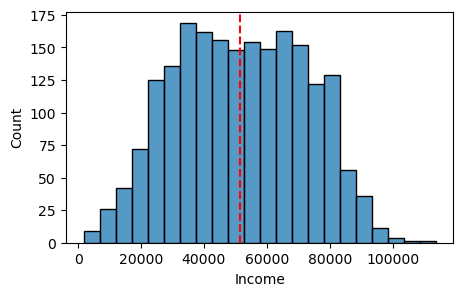

In [82]:
#The Income column histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['Income'])
median = df['Income'].median()
plt.axvline(median, color='red', linestyle='--')
print('Median: {}'.format(median))

Median: 343.0


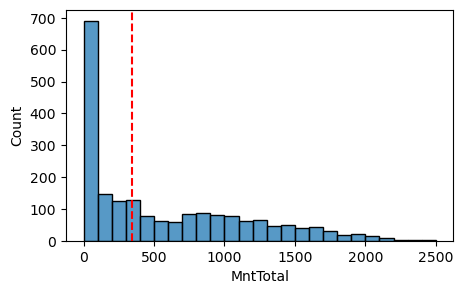

In [83]:
#The Total Spent columns histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['MntTotal'], bins=range(0,2600,100))
median = df['MntTotal'].median()
plt.axvline(median, color='red', linestyle='--')
print('Median: {}'.format(median))

## **Feature Engineering**

In [72]:
#Total number of purchases
df['NumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['NumPurchases'].describe()

count    2023.000000
mean       12.568463
std         7.164531
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumPurchases, dtype: float64

In [73]:
#The Average amount per purchase
df['AvgMntPerPurchase'] = df['MntTotal']/df['NumPurchases']

In [74]:
df.loc[df['AvgMntPerPurchase']==np.inf, 'AvgMntPerPurchase'] = 0
df['AvgMntPerPurchase'].describe()

count    2023.000000
mean       34.292679
std        29.202407
min         0.000000
25%        10.250000
50%        26.384615
75%        45.597436
max       176.000000
Name: AvgMntPerPurchase, dtype: float64

In [75]:
#The Average amount per regular purchase
df['AvgRegMntPerPurchase'] = df['MntRegularProds']/df['NumPurchases']

In [76]:
df.loc[df['AvgRegMntPerPurchase']==np.inf, 'AvgRegMntPerPurchase'] = 0
df['AvgRegMntPerPurchase'].describe()

count    2023.000000
mean       31.048142
std        28.663689
min       -75.500000
25%         8.000000
50%        22.846154
75%        42.415242
max       174.000000
Name: AvgRegMntPerPurchase, dtype: float64

In [77]:
#The influence of deals on number of purchases
df['DealPerPurchase'] = df['NumDealsPurchases']/df['NumPurchases']
df.loc[df['DealPerPurchase']==np.inf, 'DealPerPurchase'] = 1
df.loc[df['DealPerPurchase'].isna(), 'DealPerPurchase'] = 1

In [78]:
df['DealPerPurchase'].describe()

count    2023.000000
mean        0.250292
std         0.371736
min         0.000000
25%         0.083333
50%         0.200000
75%         0.333333
max        15.000000
Name: DealPerPurchase, dtype: float64

In [79]:
df[df['DealPerPurchase'] > 1].head()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Response,NumPurchases,AvgMntPerPurchase,AvgRegMntPerPurchase,DealPerPurchase
1022,29,0,0,1,0,0,8028.0,1,0,0,...,0,0,0,0,0,0,1,176.0,174.0,15.0


Median: 0.2


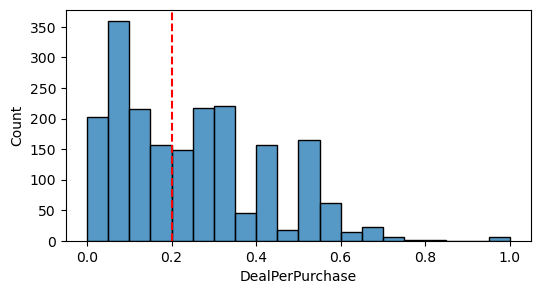

In [81]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['DealPerPurchase'], bins=20)
median = df['DealPerPurchase'].median()
plt.axvline(median, color='red', linestyle='--')
print('Median: {}'.format(median))

In [88]:
#Drop col added that didn't seem promising
df = df.drop(['NumPurchases', 'AvgRegMntPerPurchase'], axis=1)

In [89]:
df.shape

(2023, 39)

In [90]:
y = df['Response']
#features to use in model
X = df.drop('Response', axis=1)

In [91]:
#Split the data into training set and testing set. Stratify to account for imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=42)

##  **1- Decision Tree Model**

In [126]:
decision_tree_model = DecisionTreeClassifier(random_state=0)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [127]:
y_pred = decision_tree_model.predict(X_test)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       428
           1       0.48      0.49      0.48        78

    accuracy                           0.84       506
   macro avg       0.69      0.70      0.69       506
weighted avg       0.84      0.84      0.84       506



In [116]:
y_pred_train = decision_tree_model.predict(X_train)

In [117]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1283
           1       1.00      0.96      0.98       234

    accuracy                           0.99      1517
   macro avg       1.00      0.98      0.99      1517
weighted avg       0.99      0.99      0.99      1517



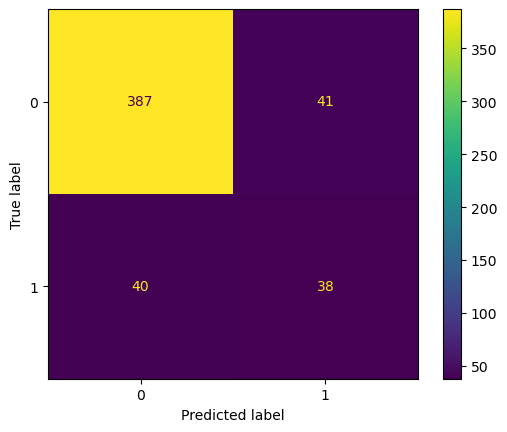

In [120]:
decision_tree_cm = confusion_matrix(y_test, y_pred, 
                                    labels=decision_tree_model.classes_)
#display confusion matrix
tree_display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_cm, 
                                  display_labels=decision_tree_model.classes_)
#Plot the confusion matrix
tree_display.plot(values_format='')
plt.show()

[Text(0.6067756028693528, 0.9722222222222222, 'x[35] <= 0.5\ngini = 0.261\nsamples = 1517\nvalue = [1283, 234]'),
 Text(0.3804213726088726, 0.9166666666666666, 'x[16] <= 2747.5\ngini = 0.157\nsamples = 1208\nvalue = [1104, 104]'),
 Text(0.23886472323972324, 0.8611111111111112, 'x[14] <= 15.5\ngini = 0.106\nsamples = 1016\nvalue = [959, 57]'),
 Text(0.1514041514041514, 0.8055555555555556, 'x[36] <= 69.389\ngini = 0.314\nsamples = 169\nvalue = [136, 33]'),
 Text(0.11396011396011396, 0.75, 'x[37] <= 0.388\ngini = 0.274\nsamples = 159\nvalue = [133, 26]'),
 Text(0.0814000814000814, 0.6944444444444444, 'x[15] <= 8.5\ngini = 0.155\nsamples = 118\nvalue = [108, 10]'),
 Text(0.06837606837606838, 0.6388888888888888, 'x[22] <= 728.5\ngini = 0.129\nsamples = 115\nvalue = [107, 8]'),
 Text(0.06186406186406186, 0.5833333333333334, 'x[24] <= 29.0\ngini = 0.115\nsamples = 114\nvalue = [107, 7]'),
 Text(0.03256003256003256, 0.5277777777777778, 'x[0] <= 38.5\ngini = 0.064\nsamples = 90\nvalue = [87, 3]

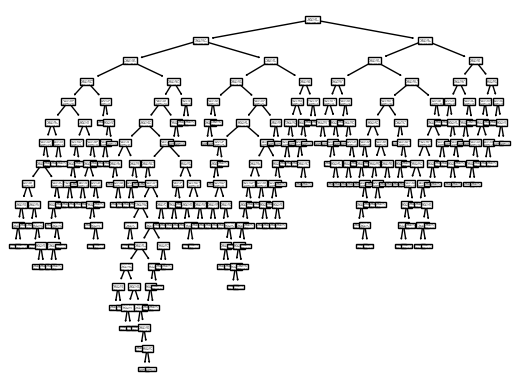

In [129]:
from sklearn import tree
tree.plot_tree(decision_tree_model)

## **2- KNN Model**

In [121]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred = KNN_model.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       428
           1       0.27      0.10      0.15        78

    accuracy                           0.82       506
   macro avg       0.56      0.53      0.52       506
weighted avg       0.76      0.82      0.78       506



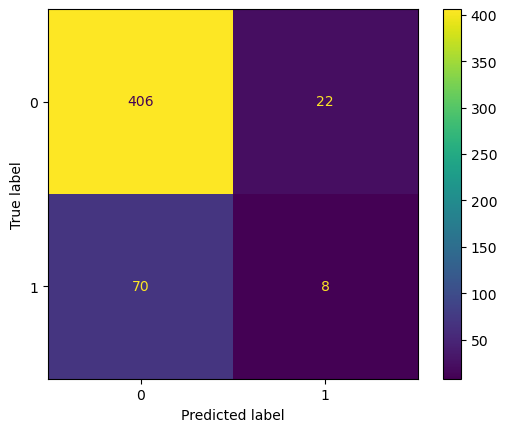

In [124]:
KNN_cm = confusion_matrix(y_test, y_pred, 
                                    labels=KNN_model.classes_)
#display confusion matrix
KNN_display = ConfusionMatrixDisplay(confusion_matrix=KNN_cm, 
                                  display_labels=KNN_model.classes_)
#Plot the confusion matrix
KNN_display.plot(values_format='')
plt.show()